In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [65]:
def uw(x,l):
    v=-np.exp(-.5*(x**2))*np.sin(np.pi*(x/l))
    z=np.linspace(-l,l,1000)
    vz=-np.exp(-.5*(z**2))*np.sin(np.pi*(z/l))
    A=np.trapz(x=z,y=np.abs(vz))
    return v/A

def dx2_h(h):
    return h[:,2:]+h[:,:-2]-2.*h[:,1:-1]

def q(u,h,alpha,dx):
    d=(np.power(h[2:],alpha)-np.power(h[:-2],alpha))/dx
    return -u[1:-1]*h[1:-1]+d

In [157]:
#L0=10.
#D0=0.4
#file_name='../numerical/data_l_'+'{:1.0E}'.format(L0)+'_d_'+'{:1.0E}'.format(D0)+'.npy'
#data=np.load(file_name)
h=np.load('../single/HL.npy')
#x,t,u,h=data
#h=data
#dx=x[1]-x[0]

In [132]:
plt.style.use('538rf')

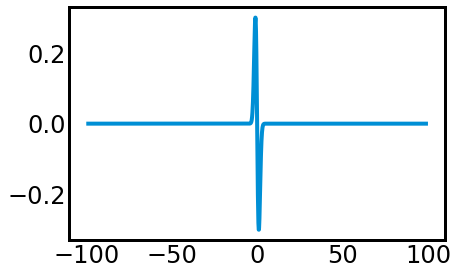

In [178]:
N=2000
L=100.
D=0.2
dx=L/N
x=np.linspace(-L+dx,L-dx,N)
u=uw(x,L)
T=np.linspace(1,len(h),len(h))*500
plt.plot(x,u)
plt.show()

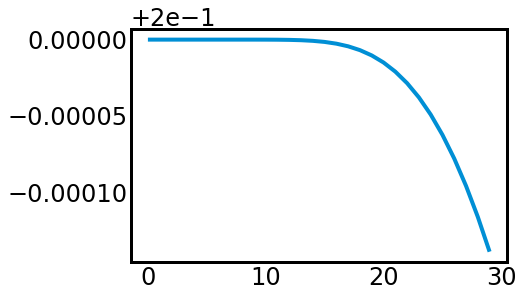

In [168]:
plt.plot(h[0:30,-1])
plt.show()

In [170]:
Q=np.zeros([30,N-2])
for ii in range(0,30):
    Q[ii]=q(u,h[ii],4.,dx)

/usr/lib/python3/dist-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/usr/lib/python3/dist-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


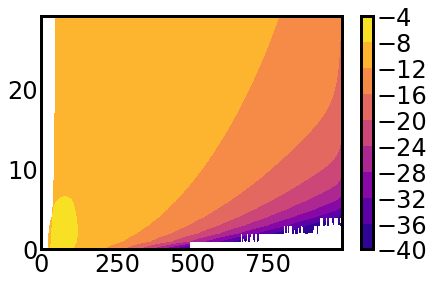

In [175]:
plt.contourf(np.log(Q[:,1000:]))
plt.colorbar()
plt.show()

2.0
0.0003535533905932738


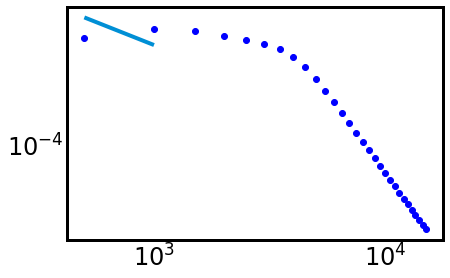

In [201]:
plt.loglog(T[:30],Q[:,1100],'bo')
t0=500
t1=1000
Q0=5*10**-4.
Q1=Q0*(t1/t0)**-.5
print(t1/t0)
print(Q1)
plt.loglog([t0,t1],[Q0,Q1])
plt.show()